
# <b><center><u><font color='red'> Mini Projet MDI220 - Clément Dardare<u><center></font>
# 
#   

   
    
    


In [28]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

## <u><font color='red'>Exercice 1<u></font>
### <u>Question 1<u>

In [5]:
df=pd.read_csv('/home/dardare/Documents/Travail/MDI/MDI220/NuclearPowerAccidents2016.csv')

### On peut maintenant arranger par date:

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')
df=df.set_index(['Date'])
df

,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
Date,,,,,,,
1946-05-21,"Los Alamos, New Mexico",0.0,NaN,NaN,NaN,Death due to citicality accident at Los Alamos...,1
1949-12-02,"Hanford, WA, USA",1100.0,4.0,3.8,NaN,"Operators release 8,000 curies of iodine-131 o...",0
1952-12-12,"Chalk River, Ontario, Canada",52.4,NaN,NaN,NaN,Hydrogen explosion damaged reactor interior an...,0
1955-03-25,"Sellafield, UK",4400.0,4.0,4.3,WE,Fire releases up to up to a few tenths of a te...,0
1955-07-14,"Sellafield, UK",2900.0,3.0,-2.4,WE,Another radioactive leak and remediation opera...,0
...,...,...,...,...,...,...,...
2014-05-17,"Tarapur, Maharashtra, India",NaN,1.0,NaN,A,Overexpossure of a worker during a transfer op...,0
2014-08-11,"Lancashire, United Kingdom",17.0,NaN,NaN,WE,Corrosion and defects found in the boiler unit...,0
2014-11-28,"Zaporizhia, Ukrain",NaN,0.0,NaN,EE,Disconnection of the unit 3 of the plant from ...,0


### Les données sont organisée par date, nous allons garder que celles jusqu'à l'accident Three Mile Island, le 1979-03-28. 

In [7]:
#On garde les dates jusqu'a l'accident:
data_date=df.loc[:'1979-02-04'] ##Date du dernier accident avant le 28 mars
data_cost=data_date['Cost (millions 2013US$)'].dropna()

print(data_cost.reset_index())

         Date  Cost (millions 2013US$)
0  1946-05-21                      0.0
1  1949-12-02                   1100.0
2  1952-12-12                     52.4
3  1955-03-25                   4400.0
4  1955-07-14                   2900.0
5  1955-11-29                   1500.0
6  1955-12-08                   1300.0
7  1957-09-11                   8189.0
8  1957-09-29                   1733.4
9  1957-10-08                     89.9
10 1958-04-13                      0.0
11 1958-05-24                     77.0
12 1958-10-15                      0.0
13 1958-12-30                      0.0
14 1959-07-26                     37.5
15 1960-03-04                     38.0
16 1961-01-03                     25.7
17 1961-06-19                    800.0
18 1964-07-23                      0.0
19 1965-01-20                      6.1
20 1966-10-05                    793.9
21 1967-05-01                   1100.0
22 1967-05-02                     87.7
23 1968-04-05                      0.0
24 1968-05-01            

### On maintenant construit le vecteur:

In [8]:
vect_cost=[data_cost[i] for i in range (data_cost.shape[0])]
print(vect_cost)
print("Nombre d'accident: " , len(vect_cost))

[0.0, 1100.0, 52.4, 4400.0, 2900.0, 1500.0, 1300.0, 8189.0, 1733.4, 89.9, 0.0, 77.0, 0.0, 0.0, 37.5, 38.0, 25.7, 800.0, 0.0, 6.1, 793.9, 1100.0, 87.7, 0.0, 1900.0, 25.7, 84.5, 16.1, 425.2, 2500.0, 541.4, 100.0, 150.0, 60.1, 100.0, 0.0, 1330.0, 1.1, 180.0, 1.2, 98.0, 788.4, 11.8, 990.0, 4.4, 11.4, 277.1, 15.0, 99.5, 511.5, 0.0, 3500.0, 1964.5, 17.1, 13.9]
Nombre d'accident:  55


## <u>Question 2<u>

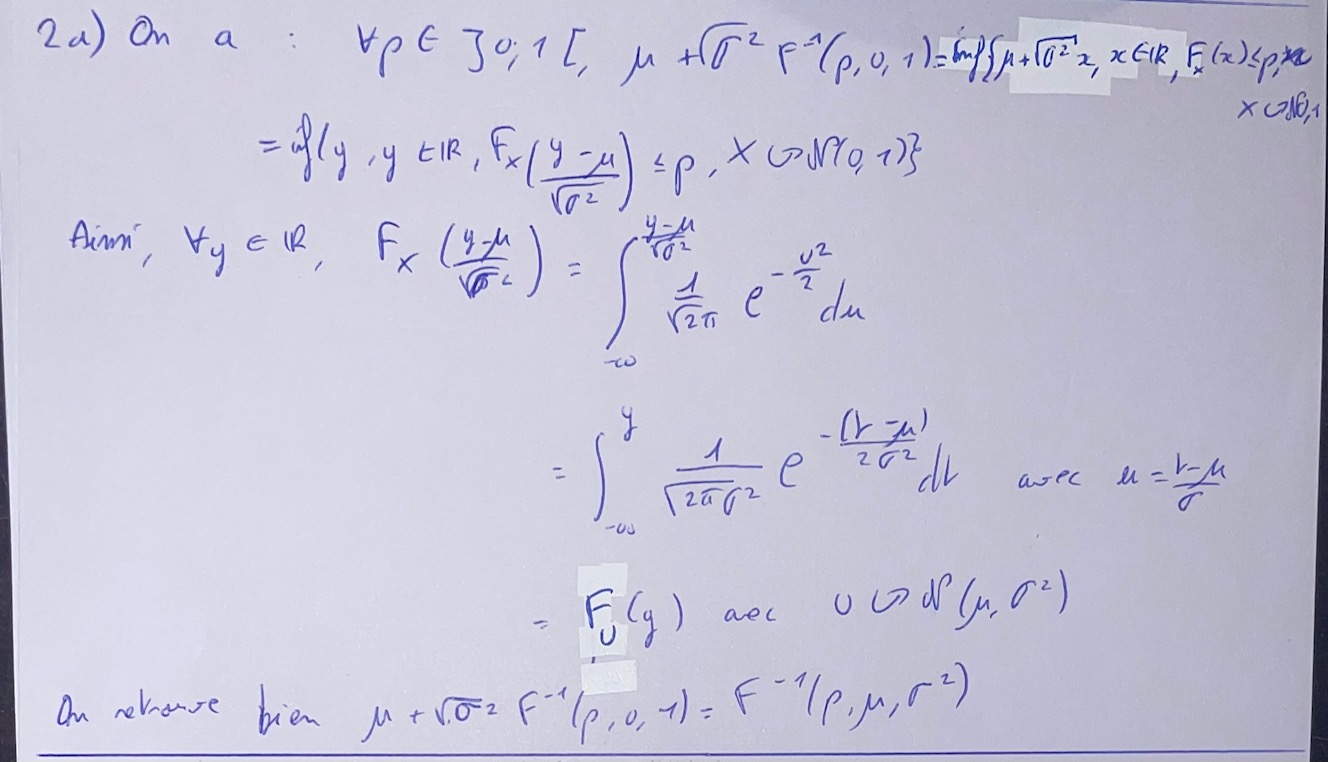

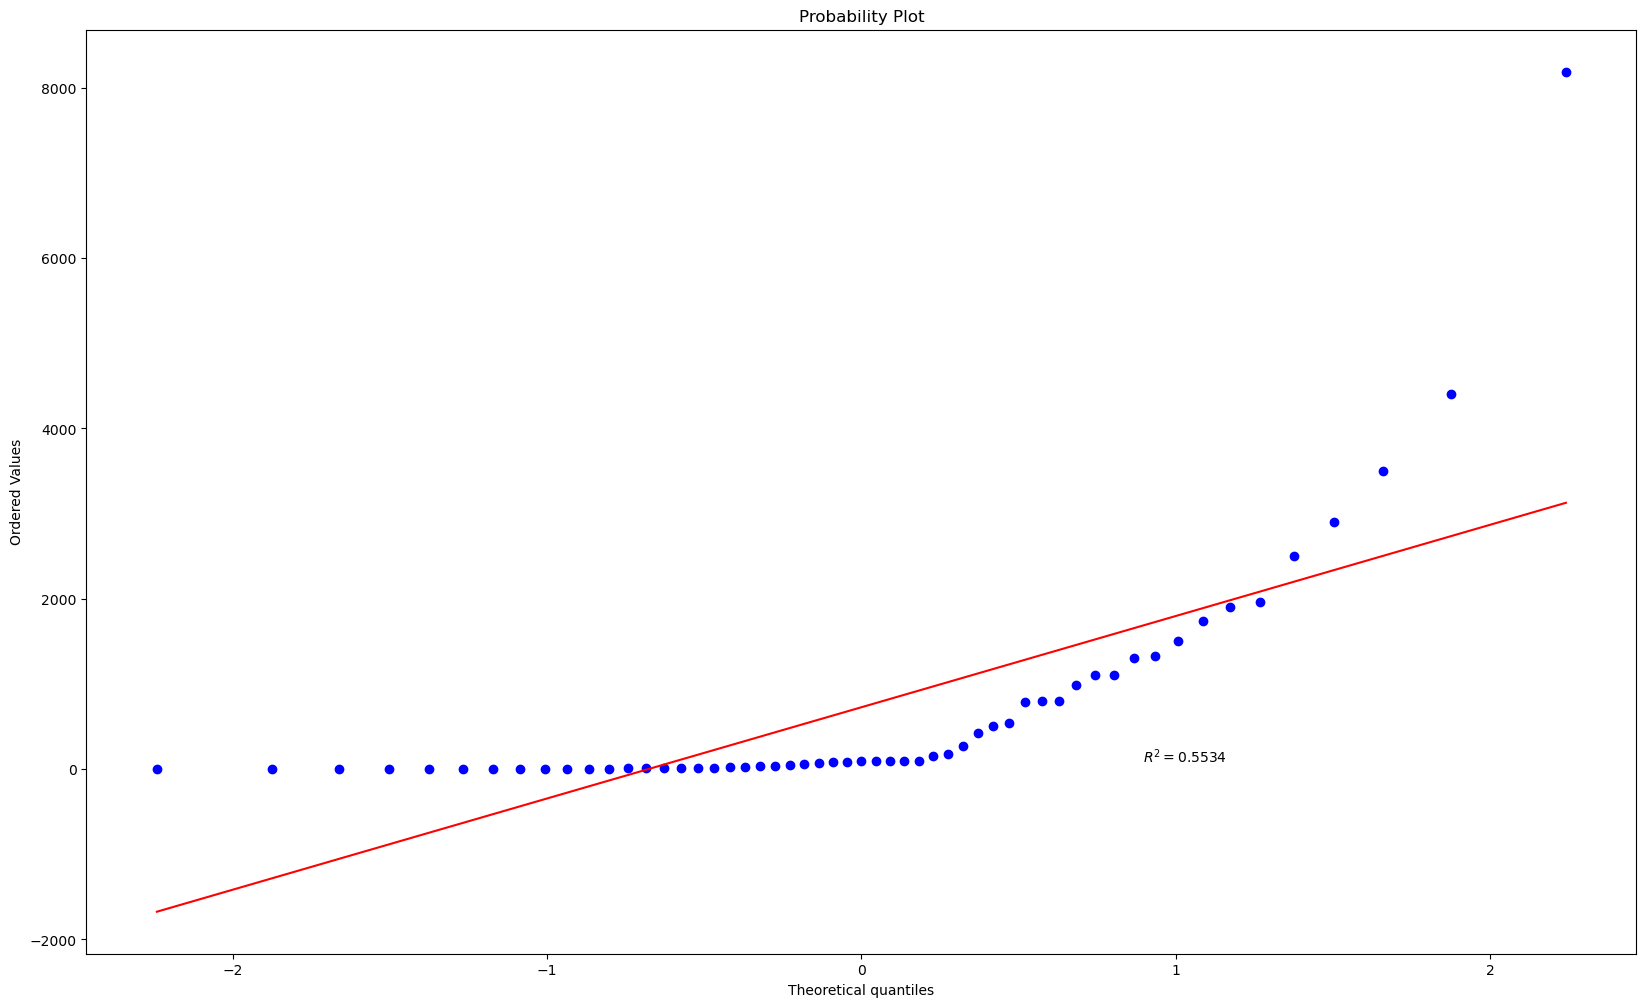

In [9]:
plt.rcParams["figure.figsize"]=(20,12)
qq=scipy.stats.probplot(vect_cost,plot=plt,rvalue=True) #dist par défaut est norm

<center> QQ-plot de données pour la loi normale <center>
    
    
    


In [10]:
print("coefficient de corrélation = " , np.sqrt(0.5534))

coefficient de corrélation =  0.7439085965358916


### On remarque que le modèle de loi normale ne semble pas être le bon.


## <u>Question 3<u>

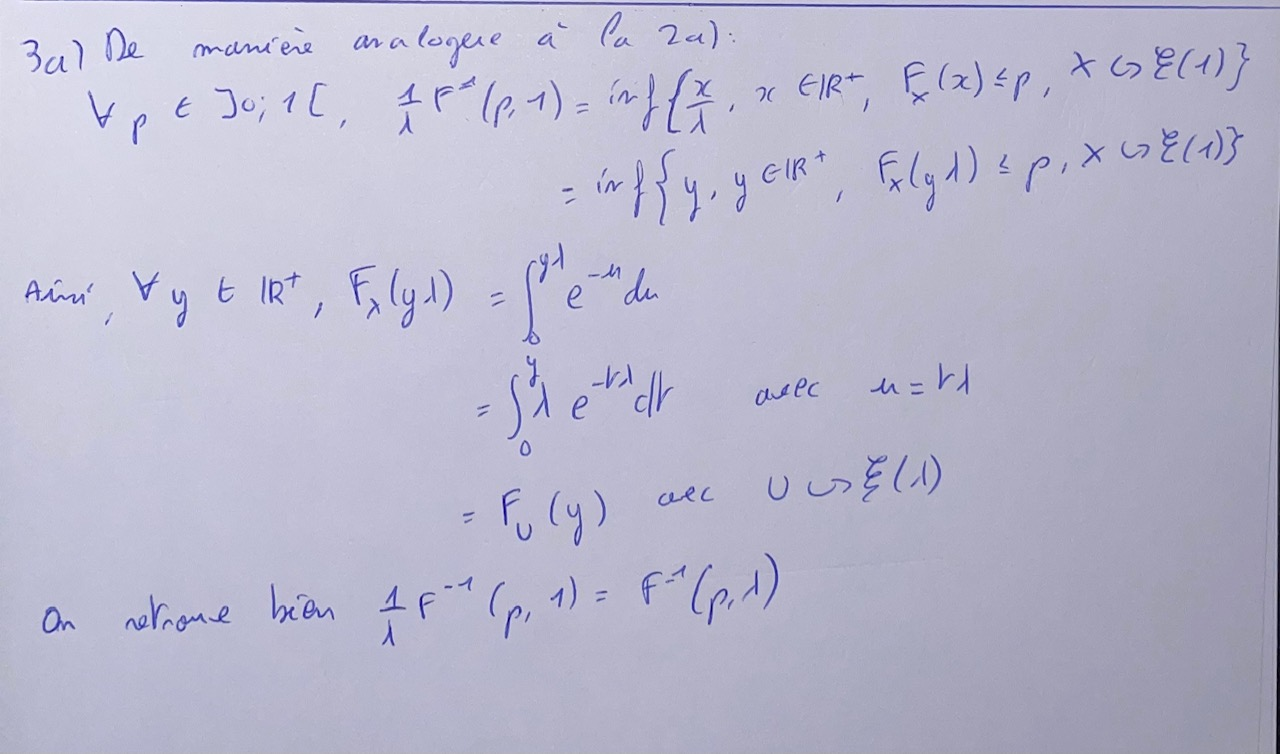

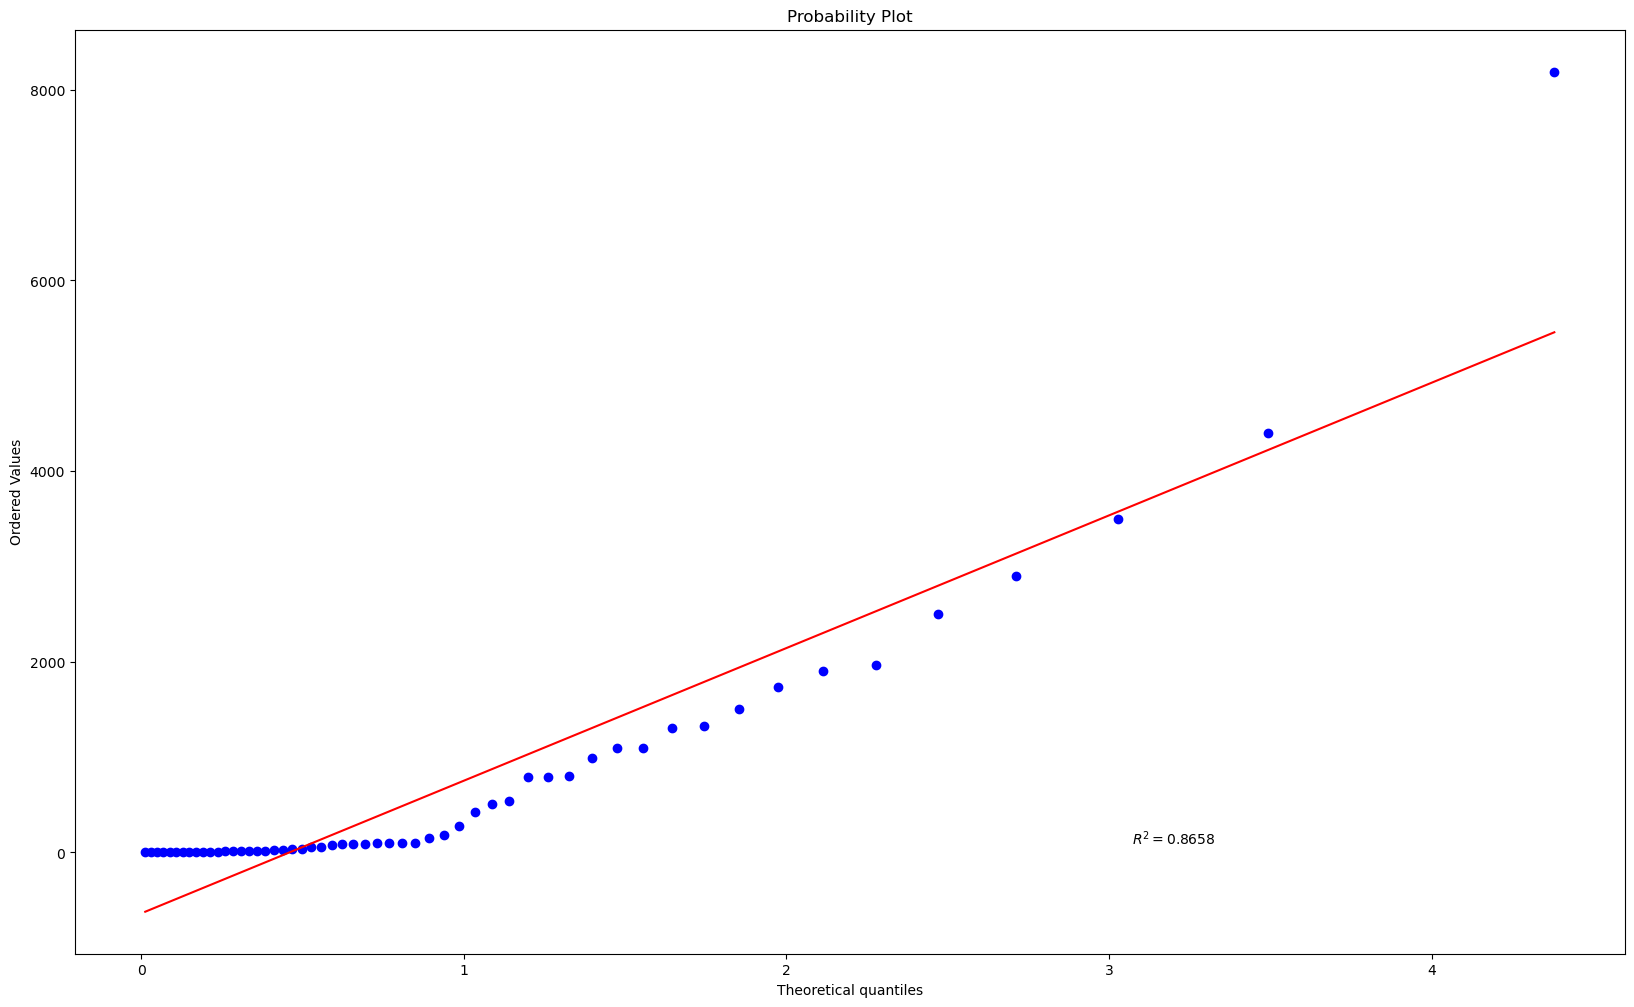

In [11]:
plt.rcParams["figure.figsize"]=(20,12)
qq=scipy.stats.probplot(vect_cost,plot=plt,dist=scipy.stats.expon,rvalue=True)

<center> QQ-plot de données pour la loi exponentielle <center>

In [12]:
print("coefficient de corrélation = " , np.sqrt(0.8658))

coefficient de corrélation =  0.9304837451562493


## <u>Question 4<u>

Au vu des coefficients de corélation, la loi exponentielle semble être la plus plausible même si elle semble s'en éloigné pour les grandes valeurs de quantile.

## <u><font color='red'>Exercice 2<u></font>

### <u> Question 1 <u>

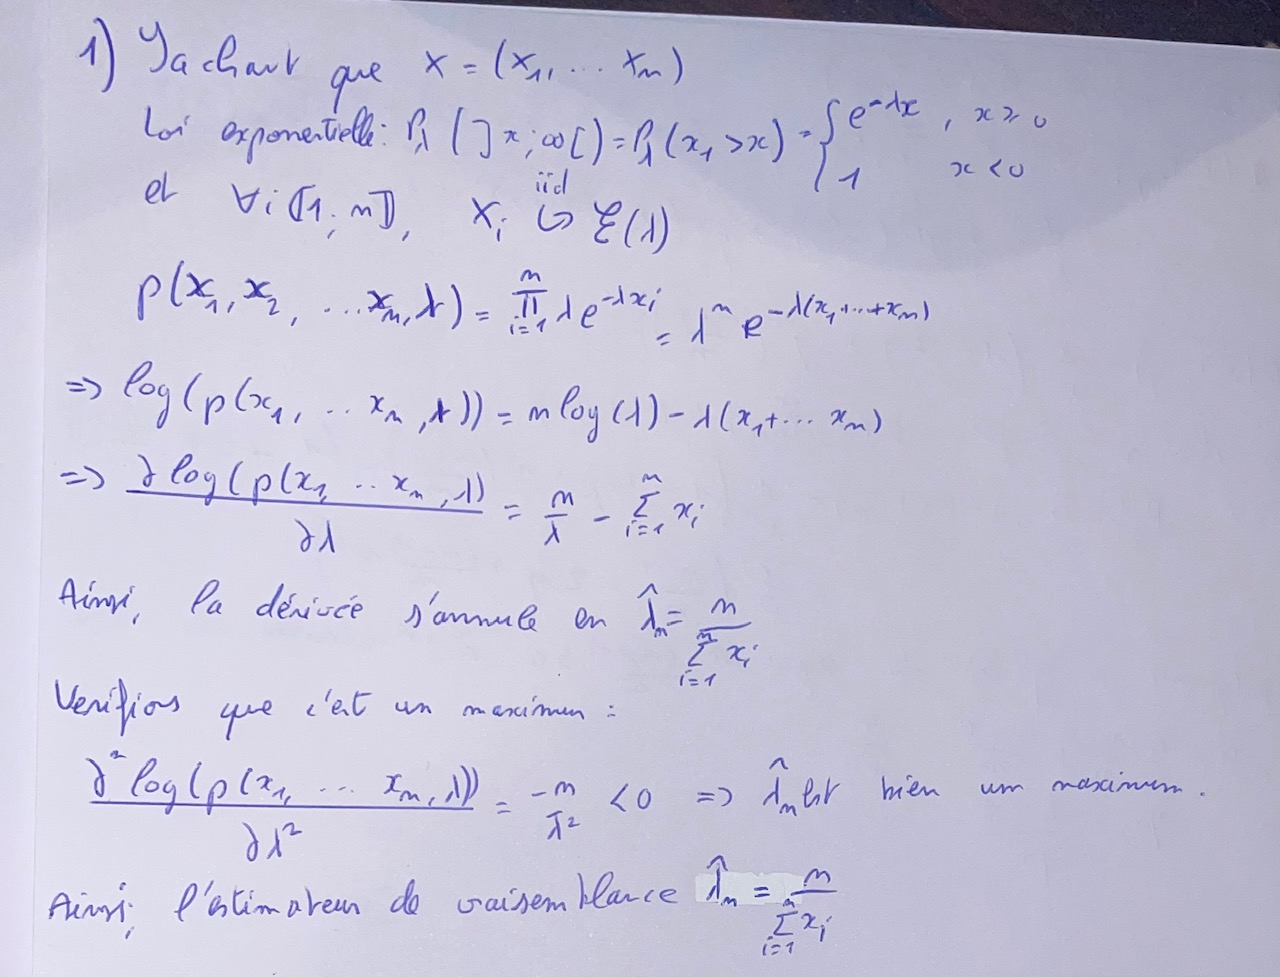

### <u> Question 2 <u>

/tmp/ipykernel_3583/3521334977.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vect_cost, kde=True,label ="données")


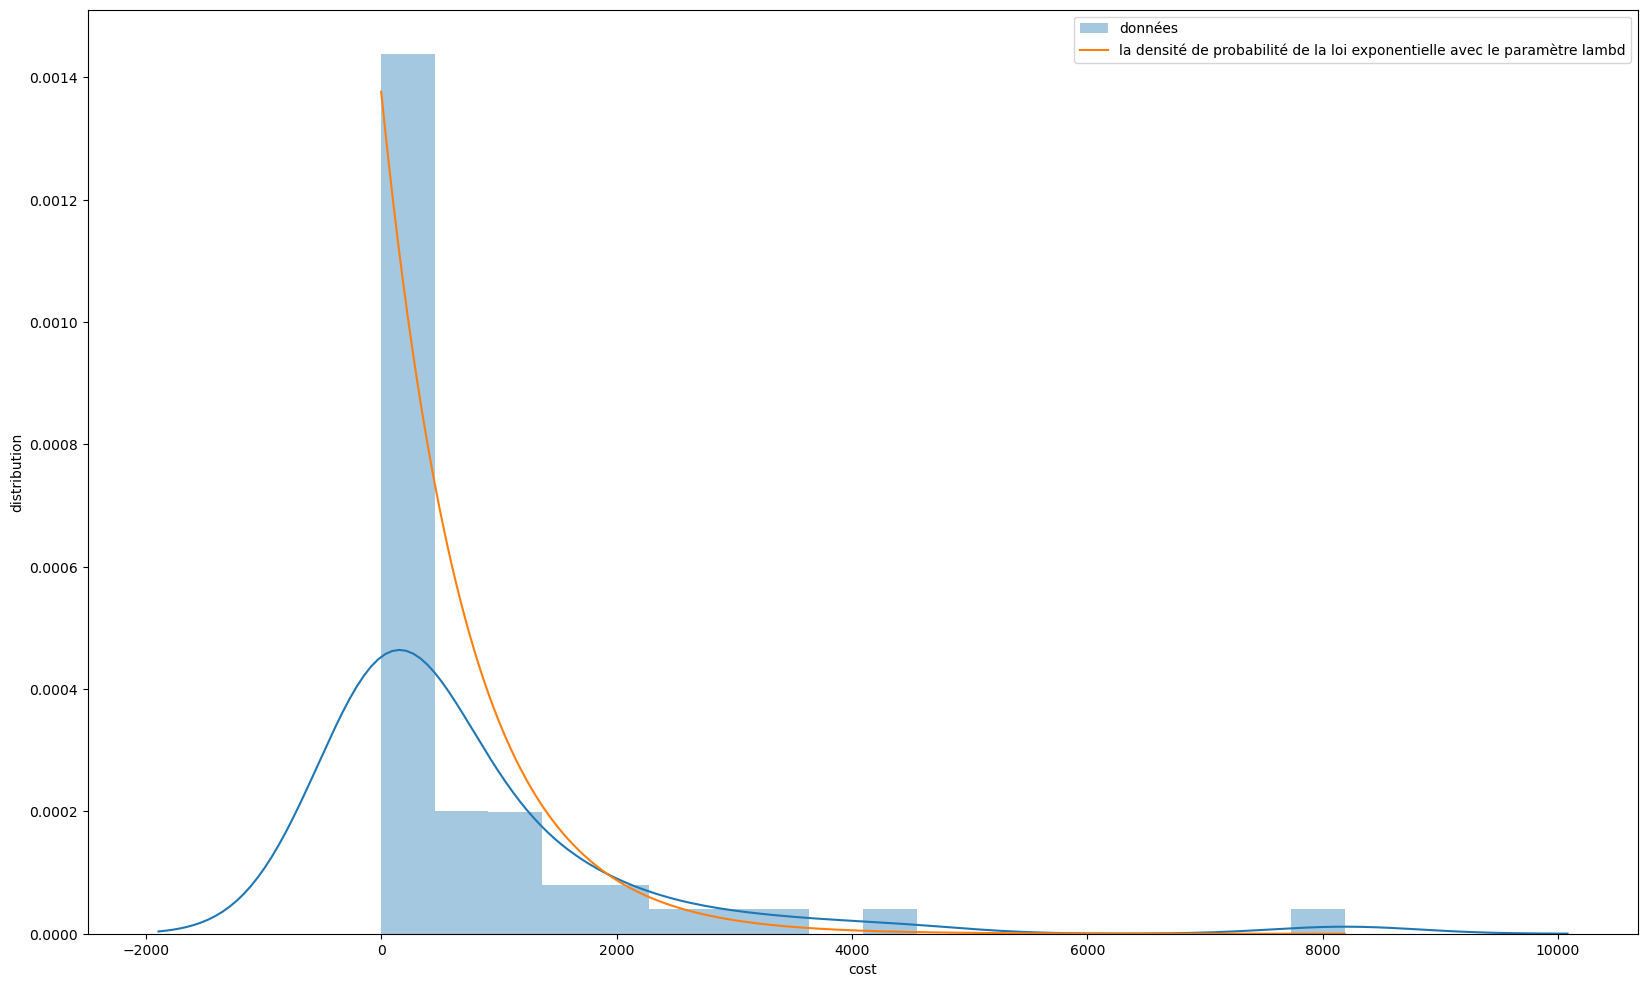

In [13]:
n=len(vect_cost)
lambd=len(vect_cost)/np.sum(vect_cost)

x=np.arange(0,max(vect_cost))
expo=[lambd*np.exp(-lambd*k) for k in x]
plt.rcParams["figure.figsize"]=(20,12)

#plt.hist(vect_cost, density=True, label="histogramme des données")
sns.distplot(vect_cost, kde=True,label ="données")
plt.plot(x,expo,label="la densité de probabilité de la loi exponentielle avec le paramètre lambd")
plt.legend()
plt.xlabel('cost')
plt.ylabel('distribution')
plt.show()


### <u> Question 3 <u>

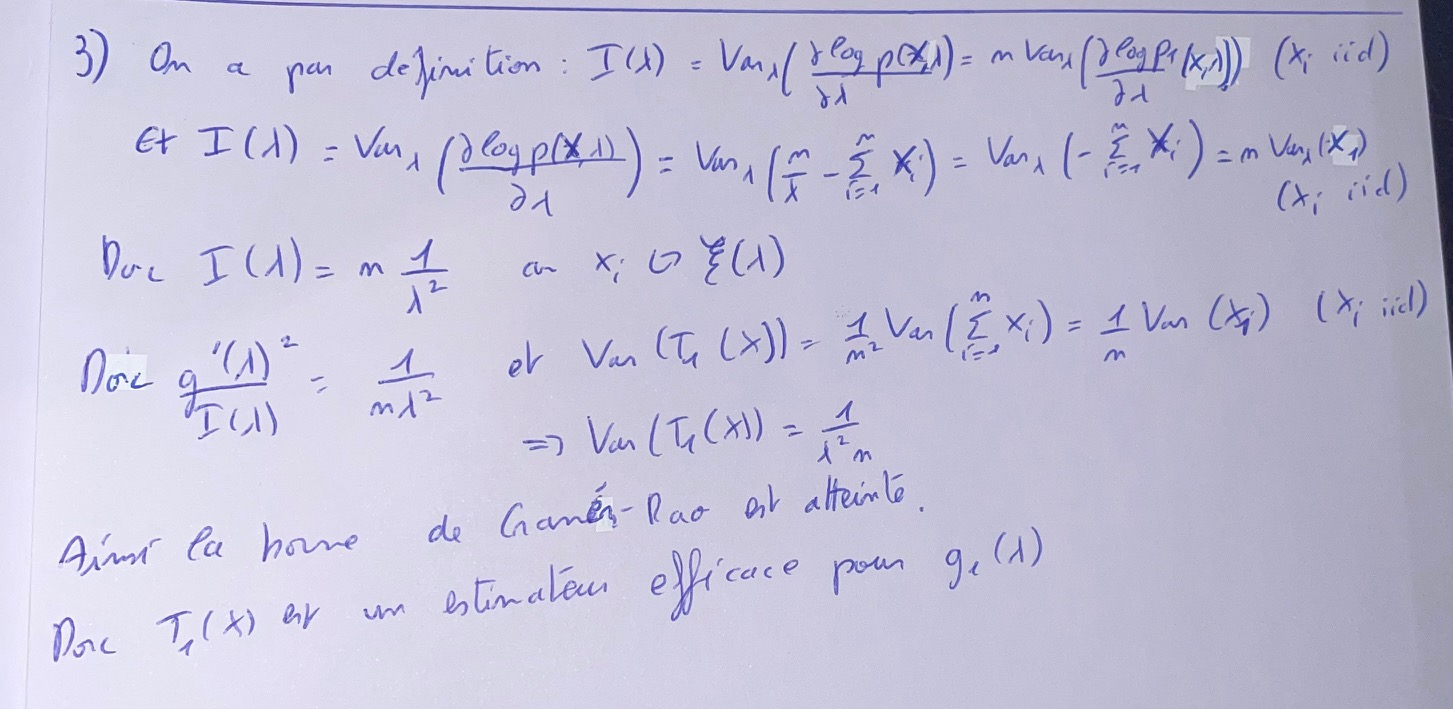

### <u> Question 4 <u>
    
On calcule la valeur de g1 en utilisant T1:

In [14]:
print("g1 = ", np.sum(vect_cost)/len(vect_cost))

g1 =  726.3363636363637


### <u> Question 5 <u>

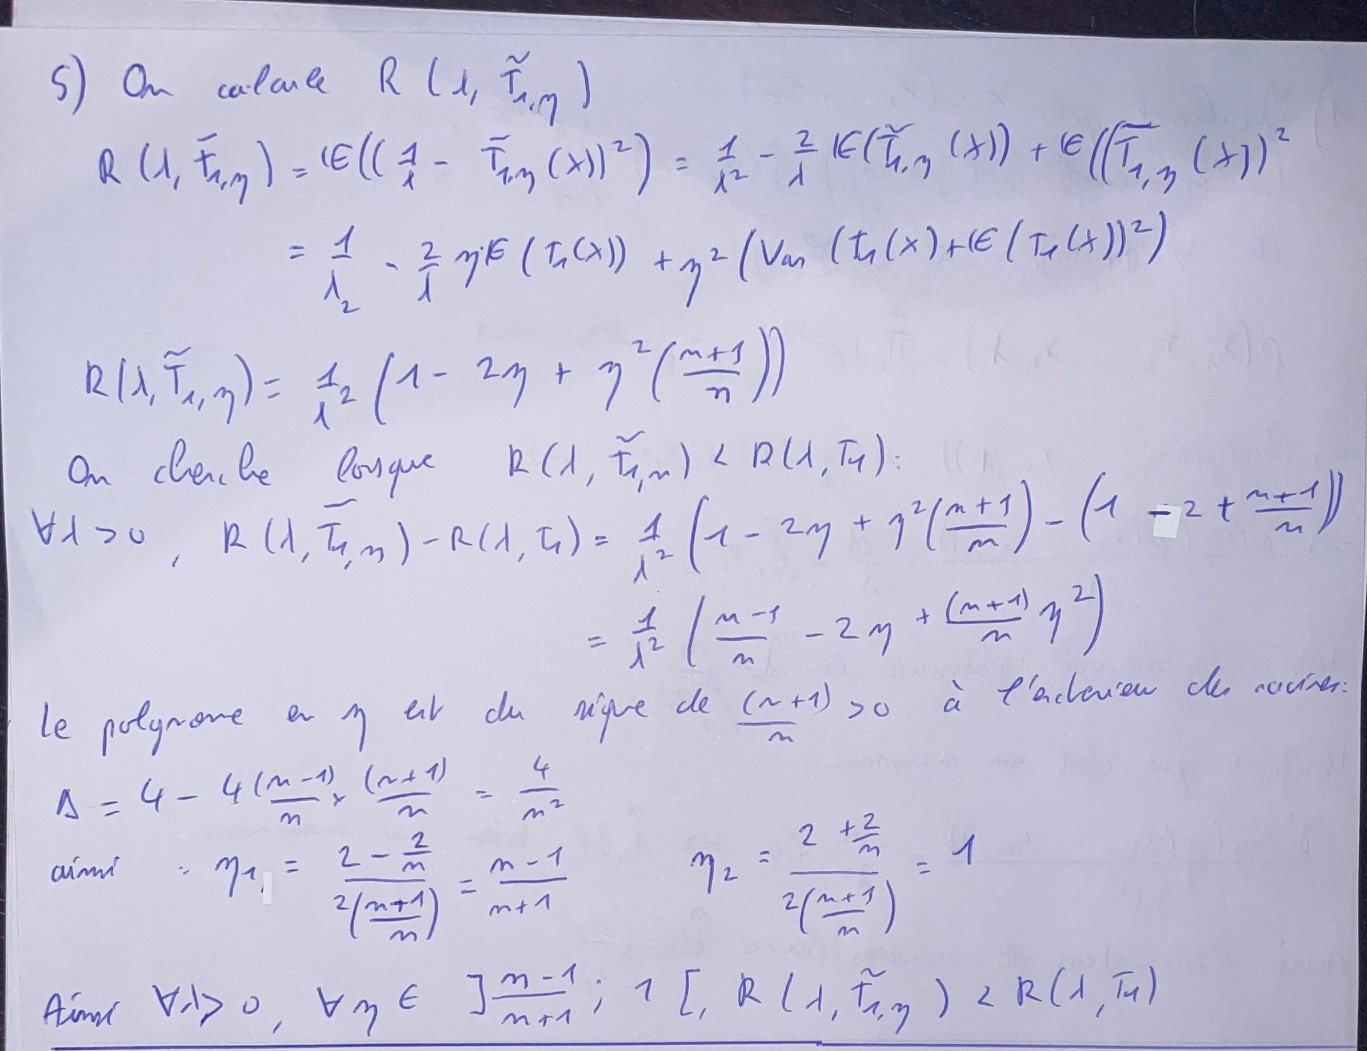

### <u> Question 6 <u>

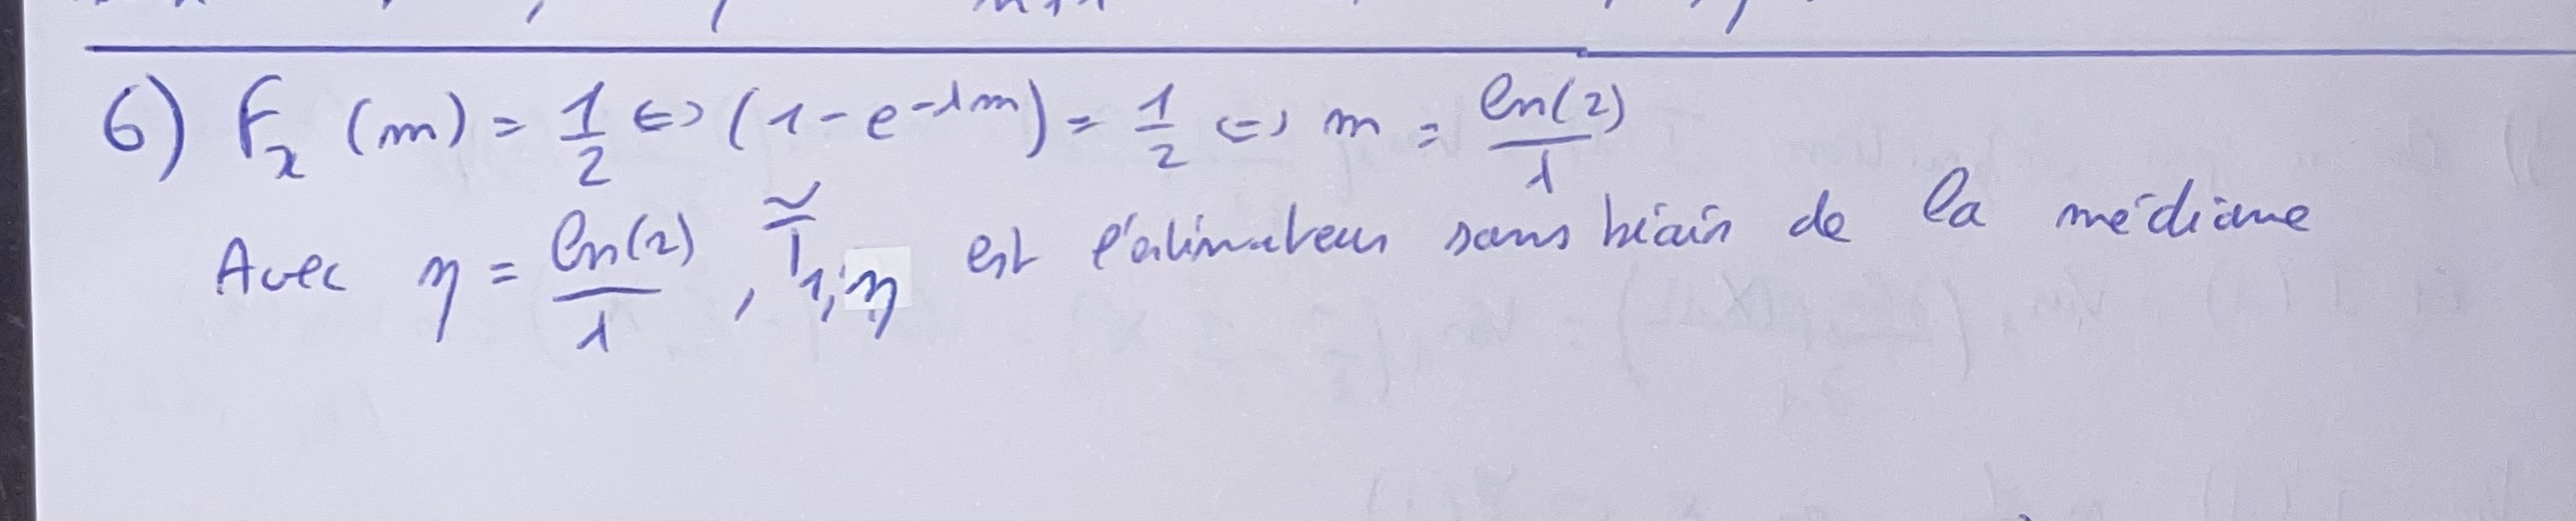

In [15]:
print("pour nu=ln(2), l'estimateur est égale à ",np.log(2)*np.mean(vect_cost))
print("la médiane est: ",np.median(vect_cost))

pour nu=ln(2), l'estimateur est égale à  503.4580025927086
la médiane est:  89.9


### <u> Question 7 <u>

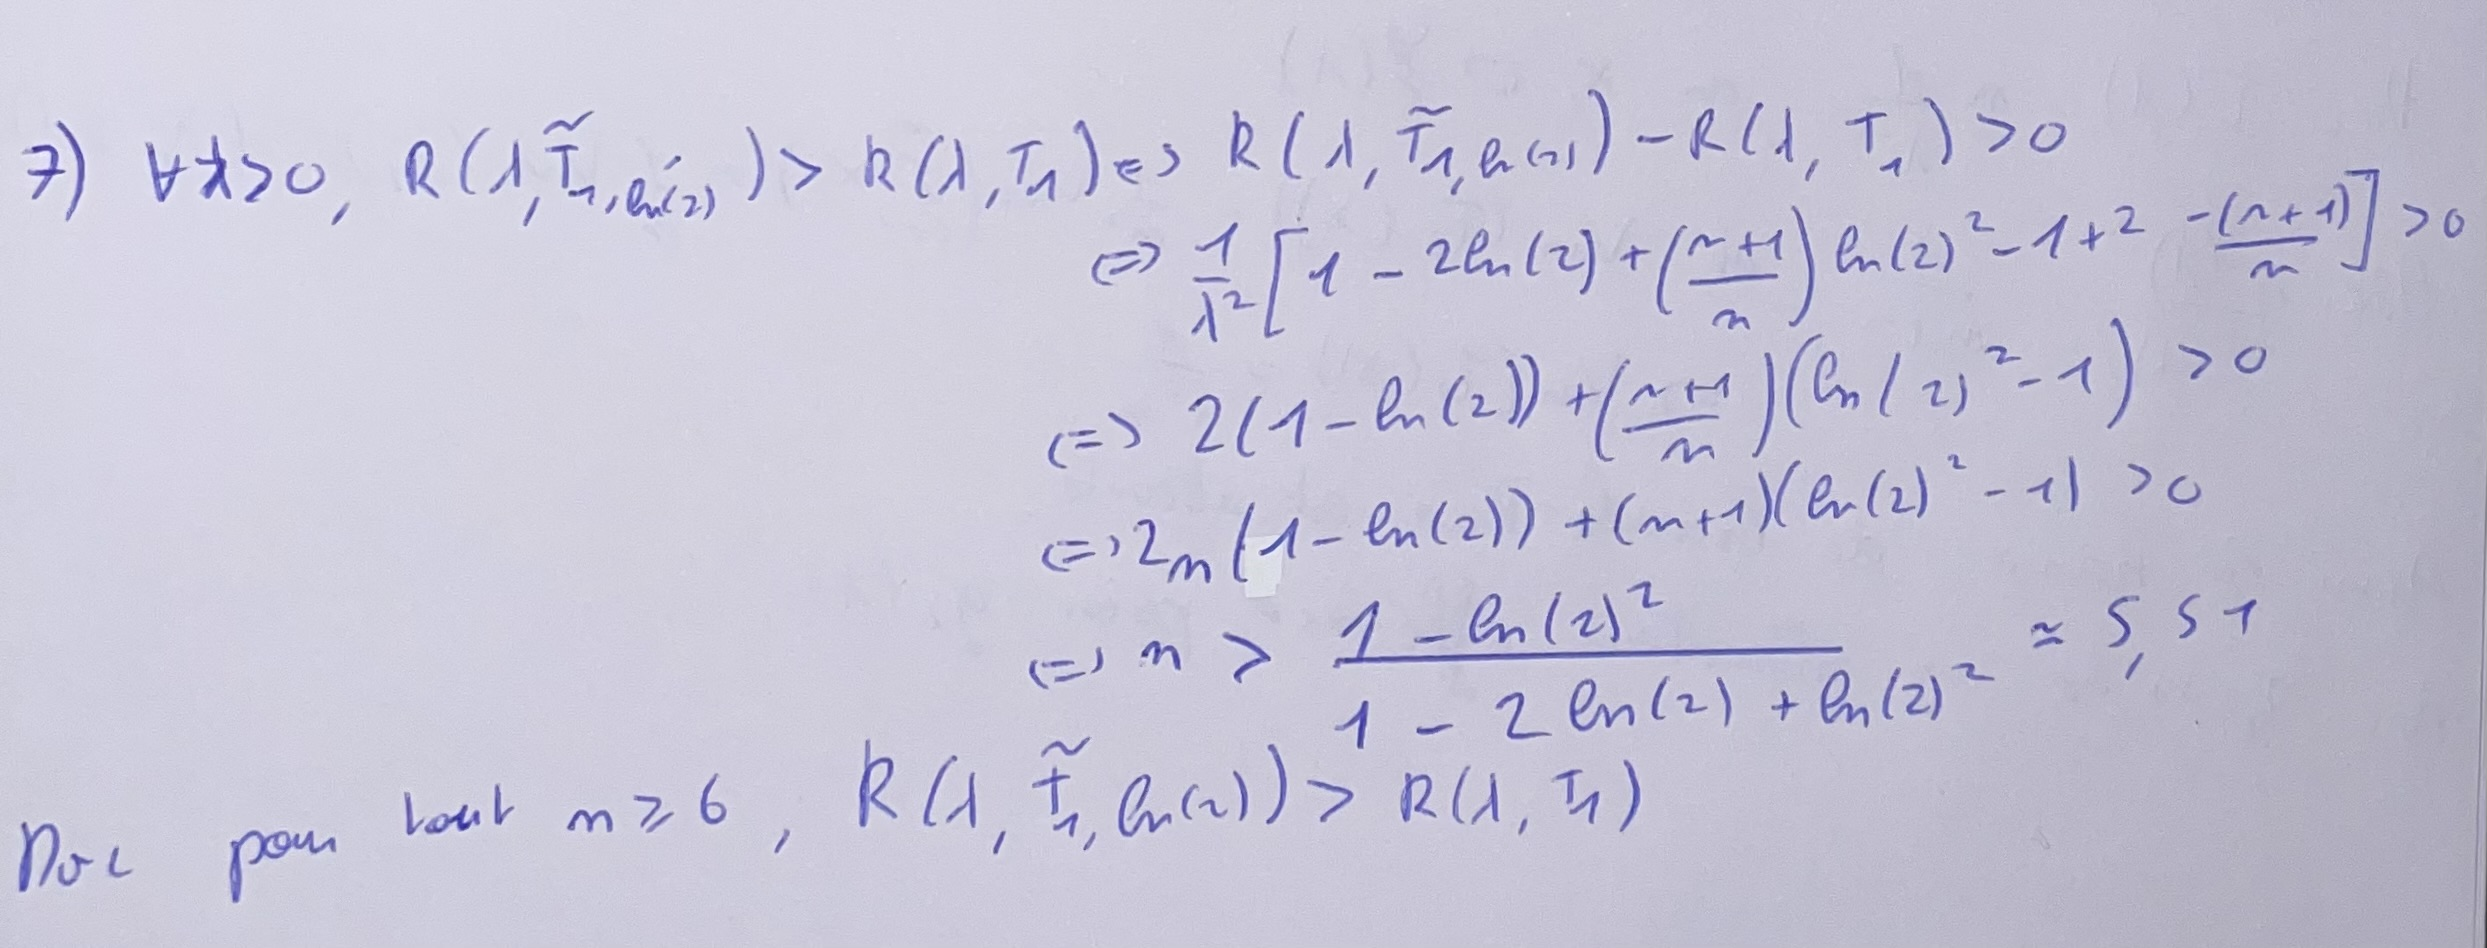

## <u><font color='red'>Exercice 3<u></font>
### <u>Question 1<u>

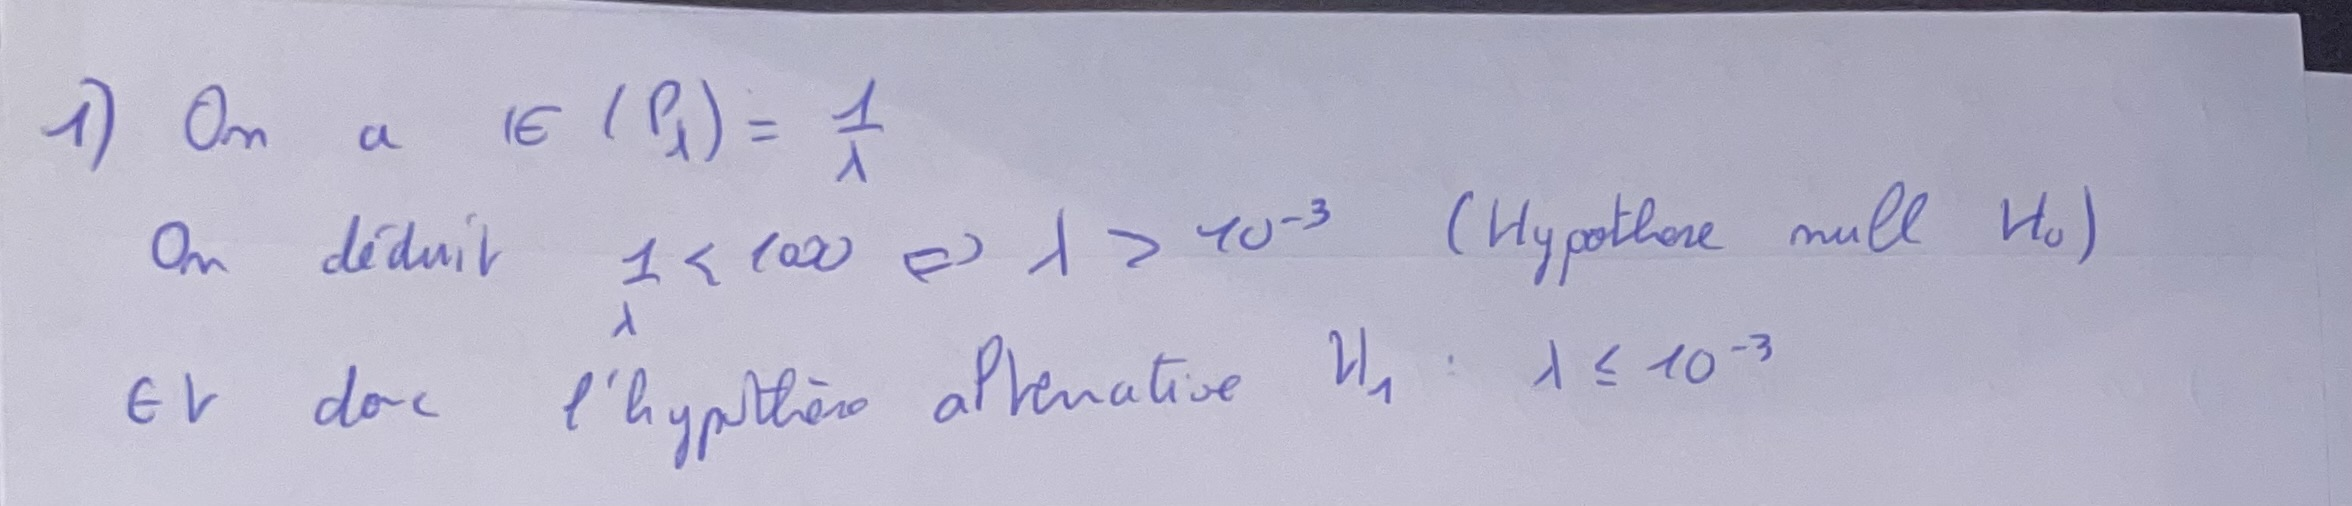

### <u>Question 2<u>

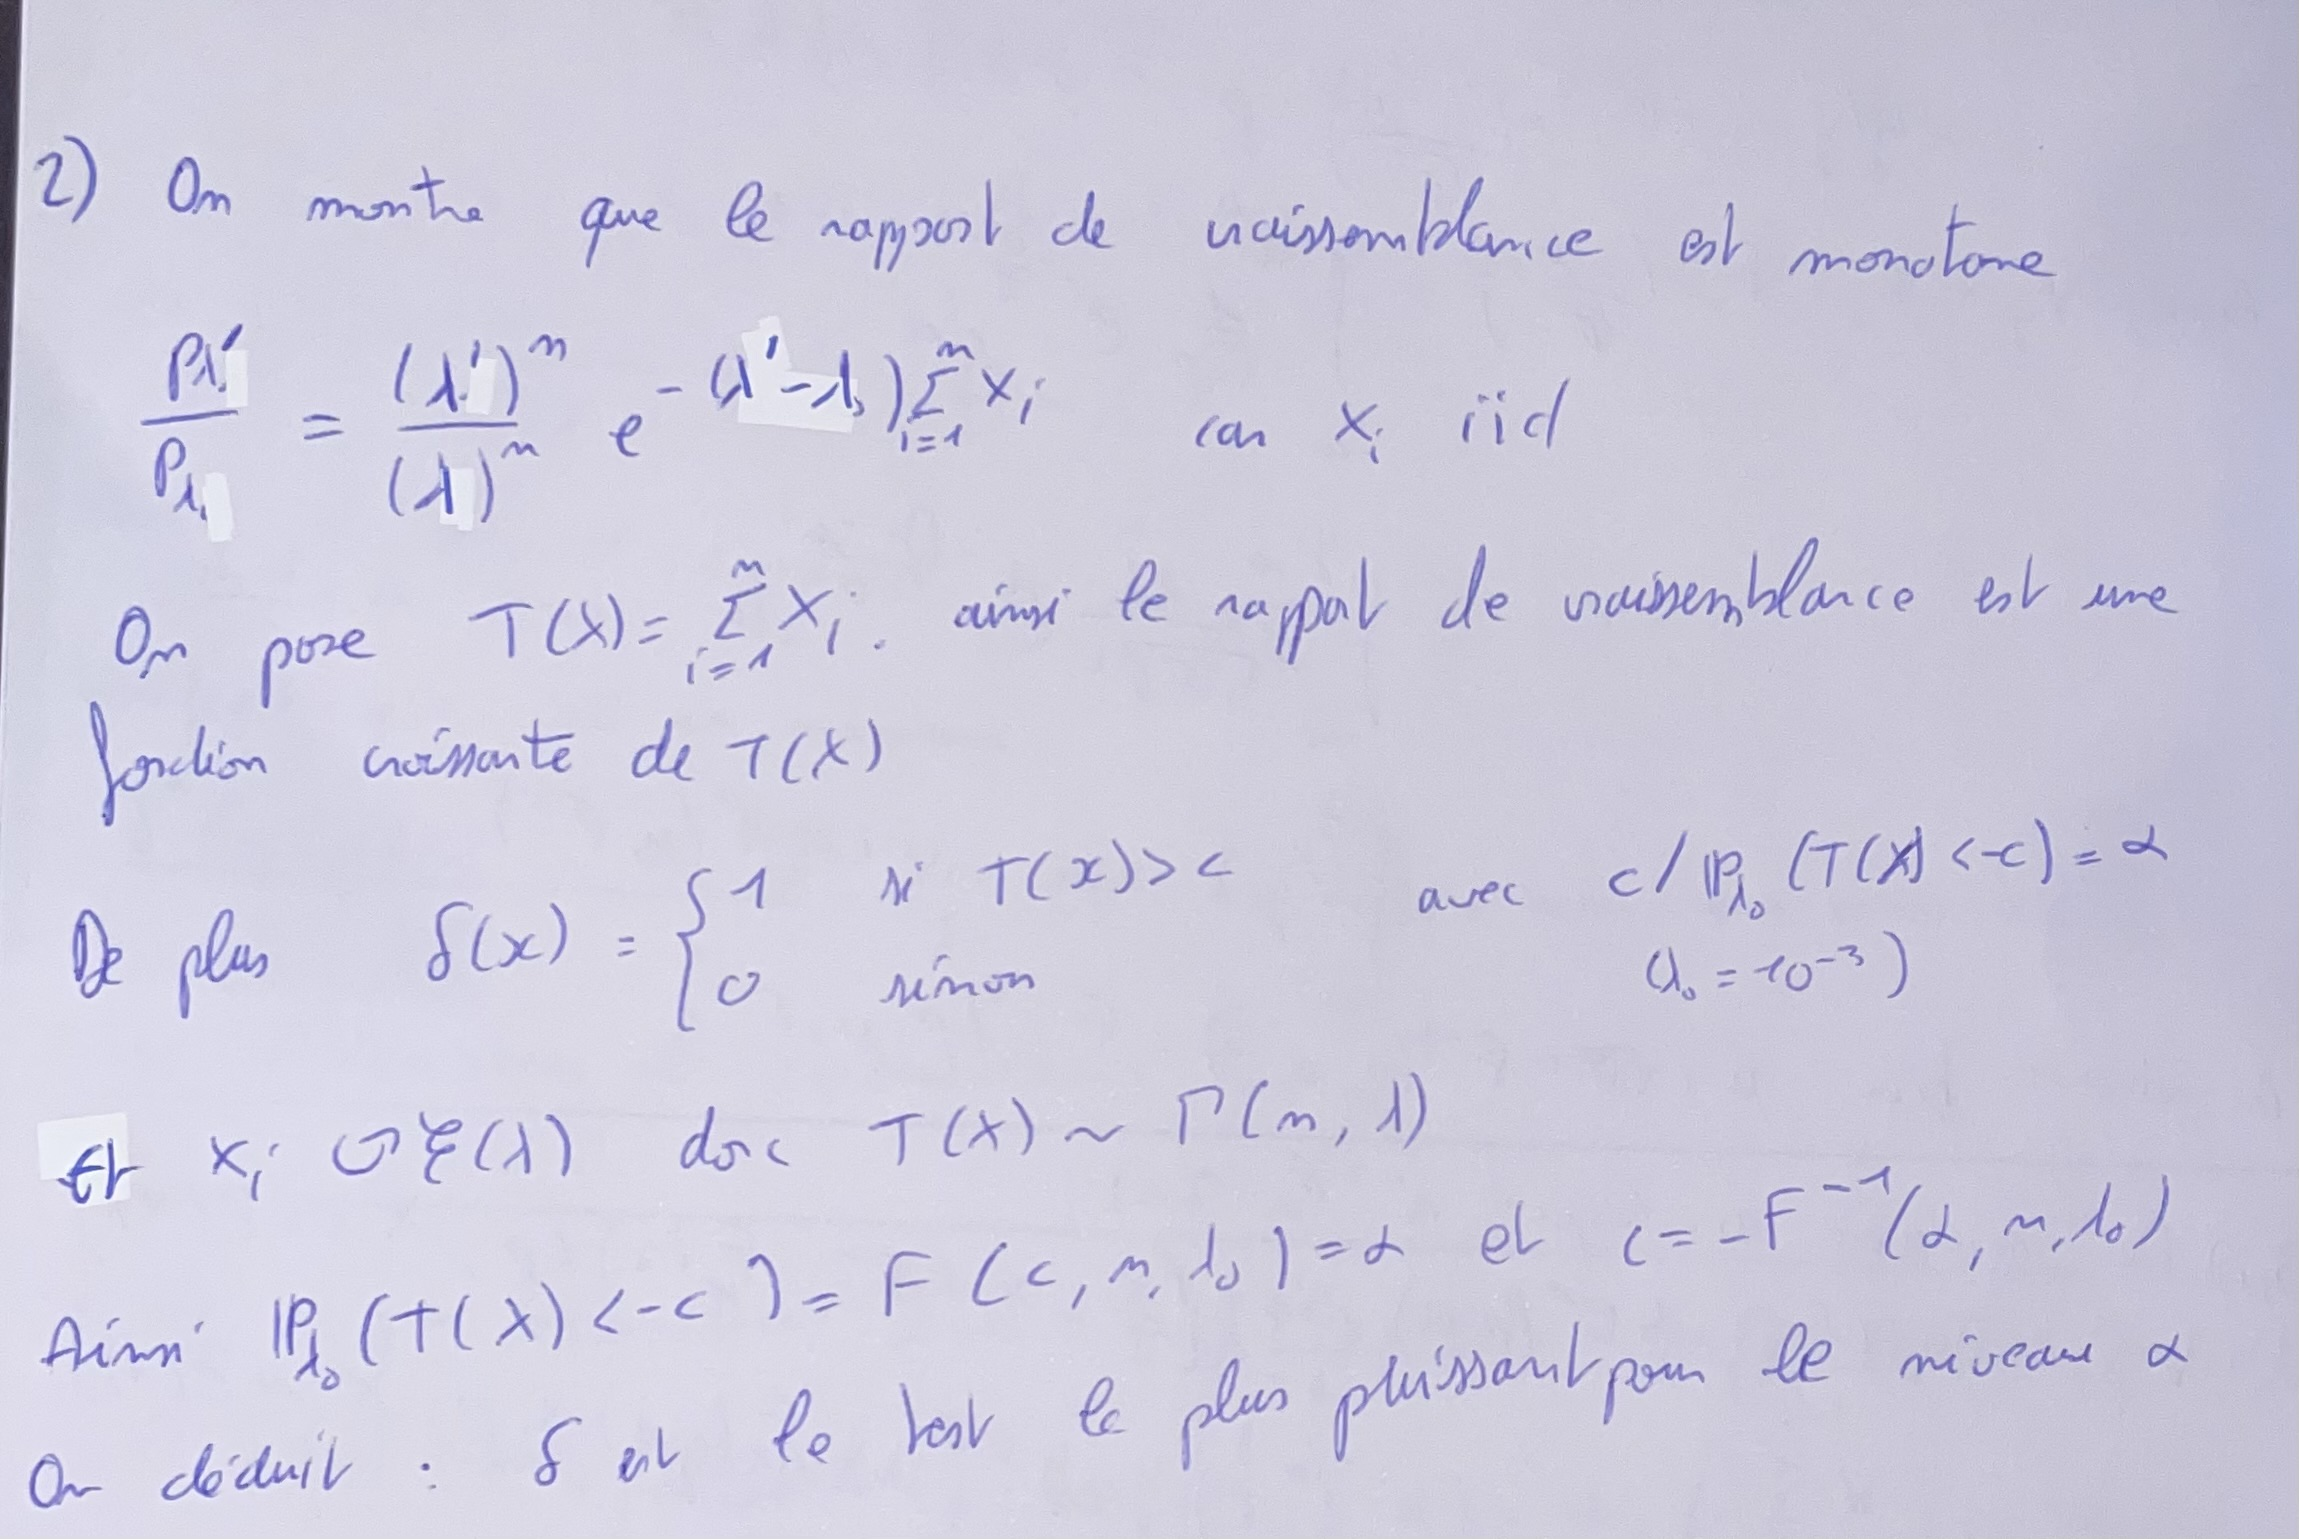

### <u>Question 3<u>

In [16]:
alpha=0.05

lambd0=10**(-3)

quant = np.quantile(np.random.gamma(n,1/lambd0,5000),0.95)
if sum(vect_cost)<=quant:
    print ("Les coûts (", sum(vect_cost),") sont inférieur au quantile (",
           quant, ")  H0 est accepté")
else:
    print ("Les coûts (", sum(costs_filtered),") sont supérieur au quantile (",
           quant, ") H0 est rejeté")

Les coûts ( 39948.50000000001 ) sont inférieur au quantile ( 67960.71730703165 )  H0 est accepté


### On calcule la p-valeur:

In [17]:
print("\n La p-valeur est: ", round(1-scipy.stats.gamma.cdf(sum(vect_cost),n,scale=1/lambd0),5))


 La p-valeur est:  0.98628


### <u>Question 4<u>

barre de rejet = 1235


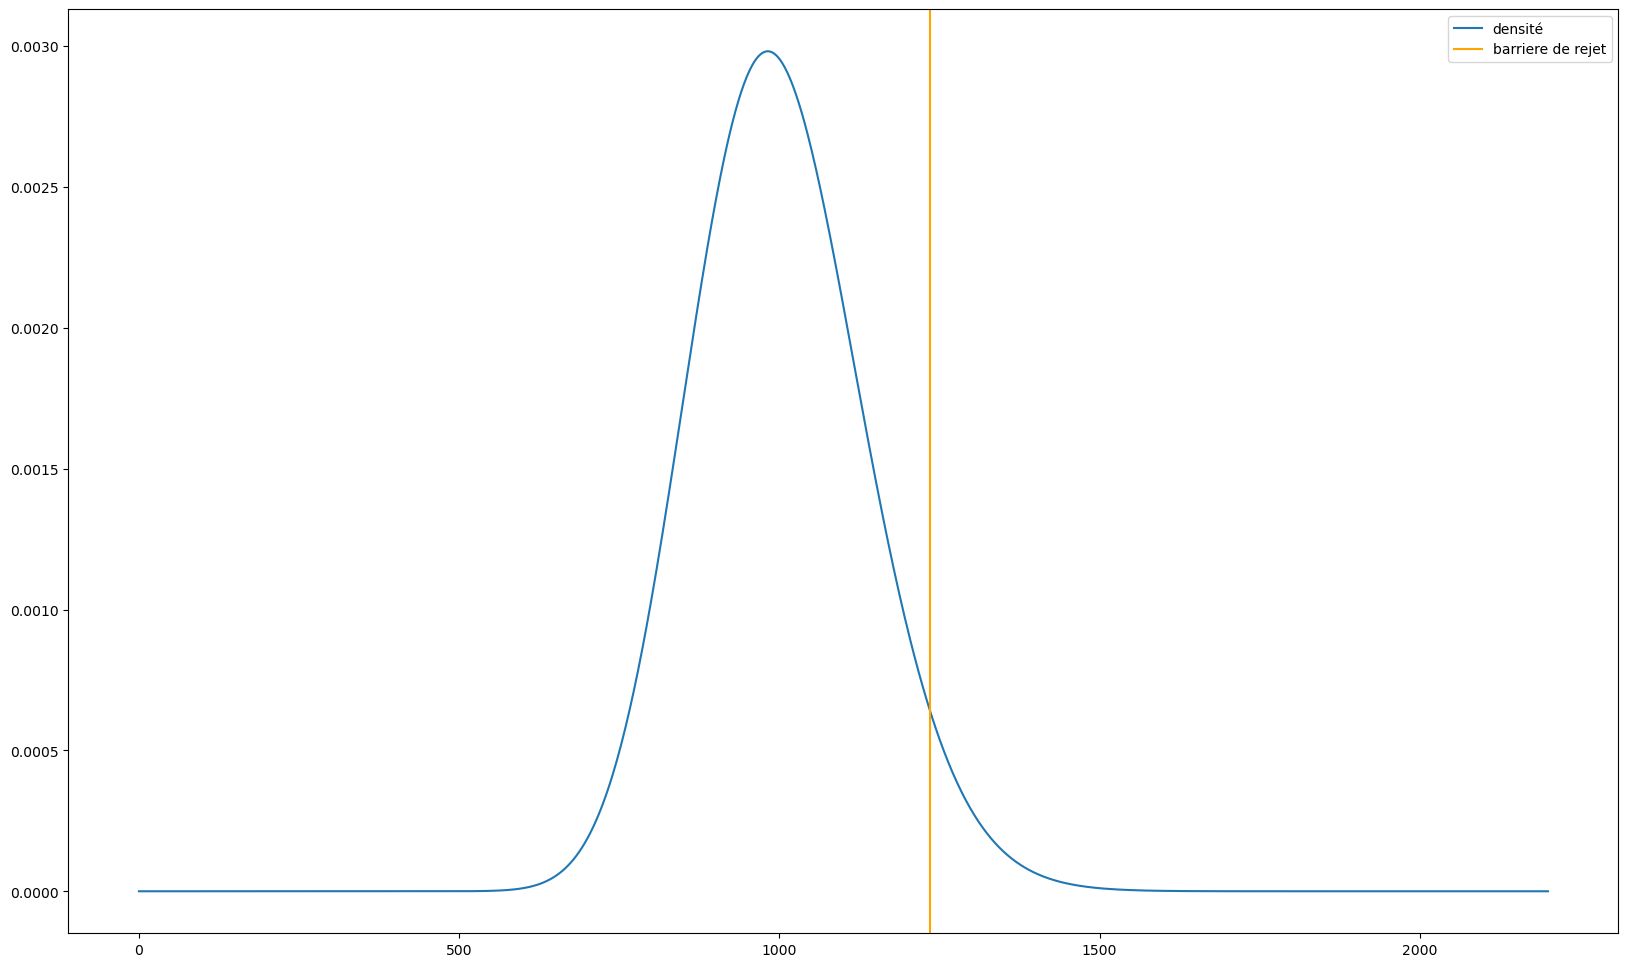

In [32]:
t= np.linspace(0,2200,1000)
n=55


limit = math.floor(quant/n)
print("barre de rejet =",limit)
f = scipy.stats.gamma.pdf(t,n,scale=1/(n*lambd0))

plt.rcParams["figure.figsize"]=(20,12)
plt.plot(t,f, label='densité')
plt.axvline(x=limit,color='orange', label='barriere de rejet')
plt.legend()
plt.show()

### <u>Question 5<u>

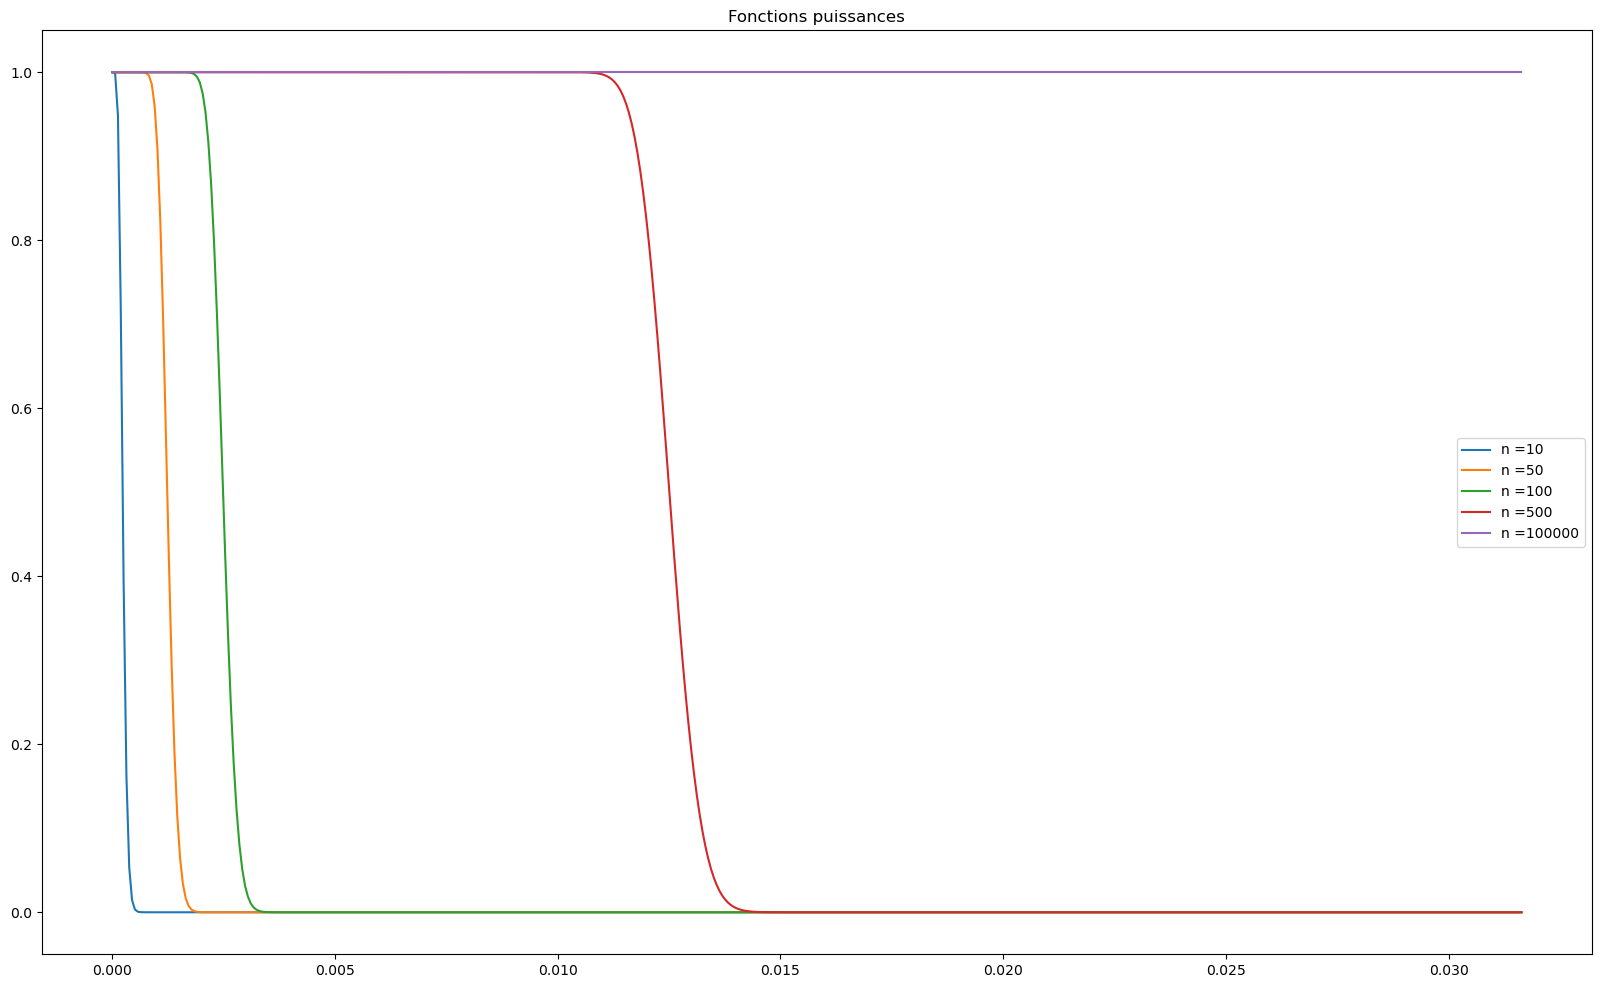

In [46]:
size=500
lam = np.linspace(10**-5,10**-1.5,size)



n = [10, 50, 100, 500, 100000]
for num in n:
    res = []
    for l in lam:
        exp = scipy.stats.gamma.rvs(num, scale = 1/l,  size = size)
        lim = np.quantile(exp,0.95)
        add = 1 - scipy.stats.gamma.cdf(np.sum(vect_cost), num, scale=1/l)
        res.append(add)  
    plt.plot(lam,res, label ="n =" + str(num))
    
plt.title("Fonctions puissances")
plt.legend()
plt.show()

### On remarque plus l'échantillon est élevée, plus la puissance reste longtemps environ égale à 1.

### <u>Question 6<u>